In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-lfn69iz7 because the default path (/home/zsiga/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## First Glances and checks

In [34]:
df = pd.read_csv('../results/final/logmaps_res.csv')
means = df[df.length==60000].groupby('method')[['r']].median()
means = means.sort_values(by='r')
print(means)
cols = means.index.tolist()
df['length'] = df.length // 3

               r
method          
Random  0.026184
SFA     0.137490
shRec   0.668460
ICA     0.691773
DCA     0.705110
KPCA    0.712700
PCA     0.716125
CCA     0.735530
DCCA    0.743515
ASOM    0.833706


In [4]:
df[df.method == 'KPCA'].r.median()

0.7057754416401973

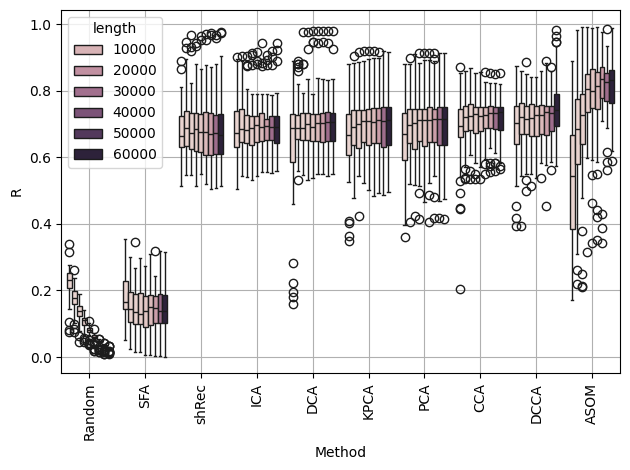

In [5]:
# figure about the 'r' values (same as previous)
plt.figure()
sns.boxplot(data=df, x='method', y='r', order=cols, hue='length')

# rotate xticklabels
plt.xticks(rotation=90)
# plt.yscale('log')

plt.ylabel('R')
plt.xlabel('Method')
plt.grid(True)
plt.tight_layout()
# plt.savefig('./notebooks/logmap_rs.png')
plt.show()

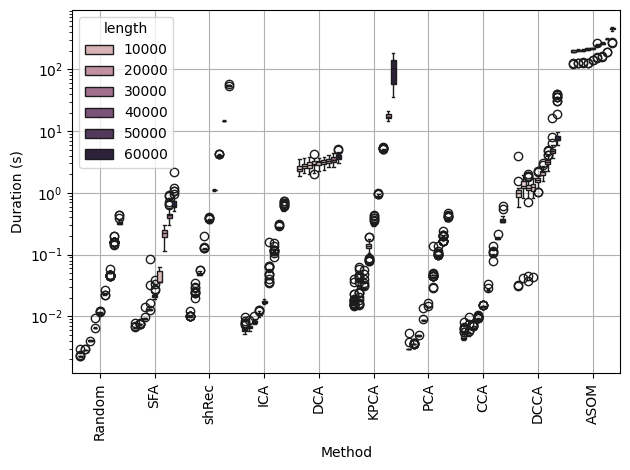

In [6]:

plt.figure()
sns.boxplot(data=df, x='method', y='duration', order=cols, hue='length')

# rotate xticklabels
plt.xticks(rotation=90)
plt.yscale('log')

plt.ylabel('Duration (s)')
plt.xlabel('Method')
plt.grid(True)
plt.tight_layout()
# plt.savefig('./notebooks/logmap_durations.png')
plt.show()



[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.9254901960784314, 0.8823529411764706, 0.2), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


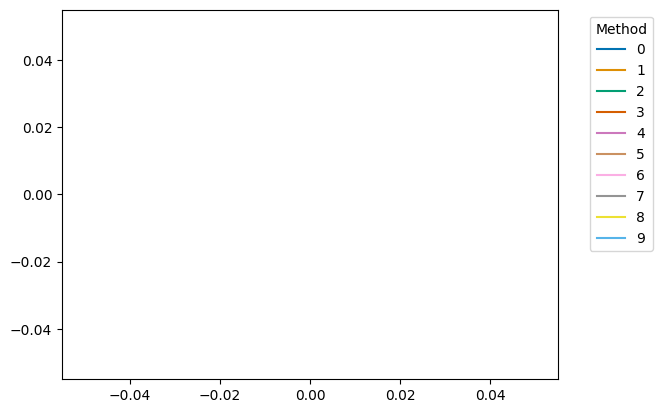

In [10]:
colors = sns.color_palette("colorblind", len(cols))

print(colors)

# print a legend
for i, col in enumerate(cols):
    plt.plot([], [], color=colors[i], label=i)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

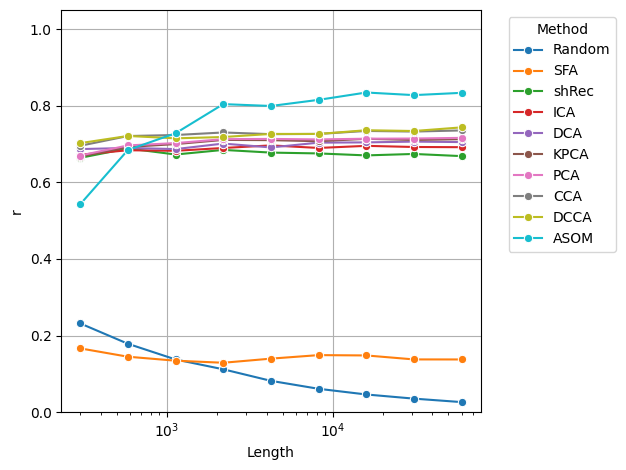

In [12]:
# making the times comparable by dividing the shortest median time per method
voi = 'r'
# colors = dict("")

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
# meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10', marker='o',
             hue_order=cols)
# plt.yscale('log')
plt.xscale('log')
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel(voi)
plt.xlabel('Length')
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()

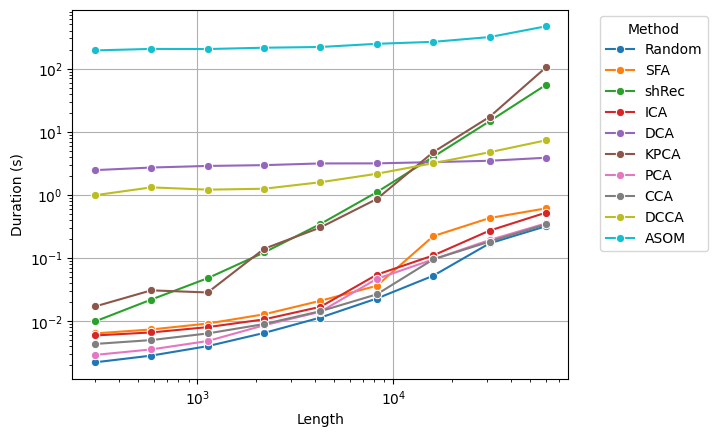

In [13]:
# making the times comparable by dividing the shortest median time per method
voi = 'duration'

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
# meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10',
             marker='o', hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Duration (s)')
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

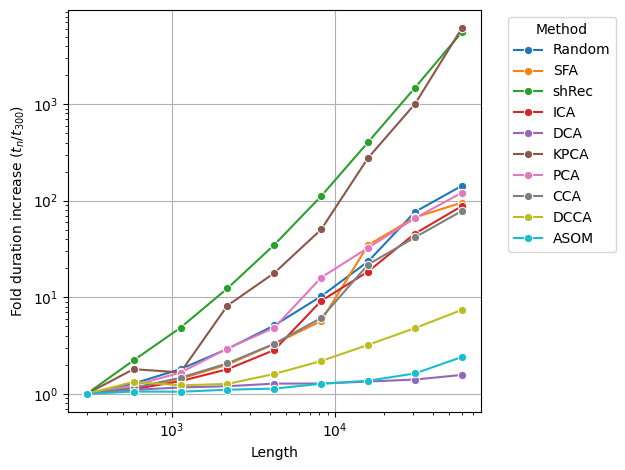

In [14]:
# making the times comparable by dividing the shortest median time per method
voi = 'duration'

meds = df.groupby(['method', 'length'])[[voi]].median().reset_index()
# divide by the shortest median time per method
meds[voi] = meds[voi] / meds.groupby('method')[voi].transform('min')

sns.lineplot(data=meds, x='length', y=voi, hue='method', palette='tab10',
             marker='o', hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'Fold duration increase ($t_{n}/t_{300}$)')
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("relative_durations.png")

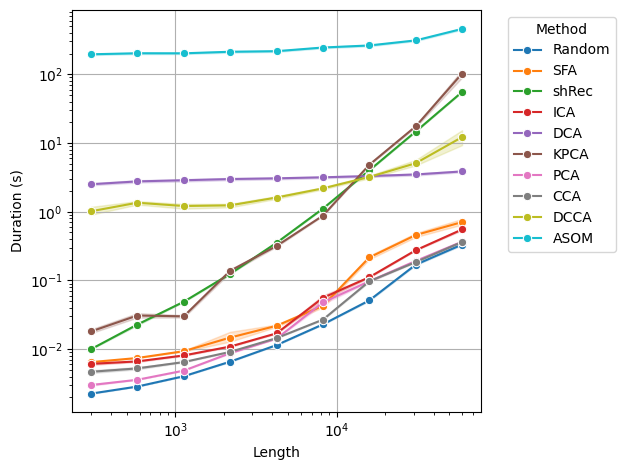

In [15]:
voi = 'duration'
plt.figure()
sns.lineplot(data=df, x='length', y=voi, hue='method', palette='tab10', marker='o', estimator='mean', errorbar=('ci', 95), hue_order=cols)
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Duration (s)")
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("durations.png")

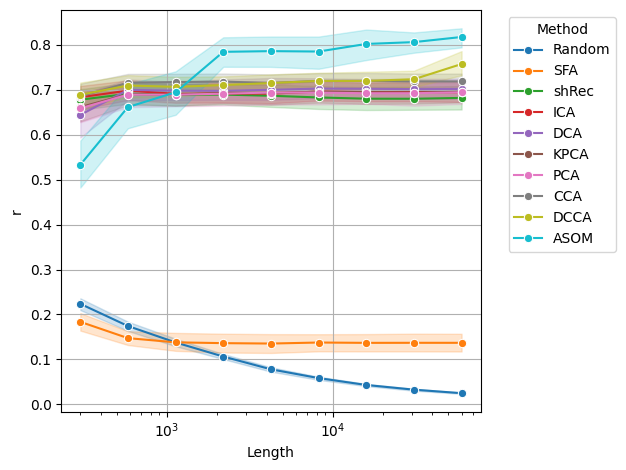

In [19]:
plt.figure()
sns.lineplot(data=df, x='length', y='r', hue='method', palette='tab10', 
             marker='o', estimator='mean', errorbar=('ci', 95), hue_order=cols)
# plt.yscale('log')
plt.xscale('log')
# plt.ylabel("Duration (s)")
plt.xlabel('Length')
plt.grid(True)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("rs.png")

## Composite figure

The figure with the 3 subplots as runtime, scaling and performance

### imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary cache directory at /tmp/matplotlib-pcdjap4w because the default path (/home/zsiga/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
L = [  100,   193,   376,   729,  1414,  2742,  5318, 10313, 20000]
M = np.loadtxt('../../results/final/SOMCorsLengths100-20e.txt', delimiter=',')
T = np.loadtxt('../../results/final/SOMTimeLengths100-20e.txt', delimiter=',')

som_dict = {L[i] : M[:, i] for i in range(len(L))}
tsom_dict = {L[i] : T[:, i] for i in range(len(L))}
# M.shape

som_df = pd.DataFrame(som_dict)
som_df = som_df.melt(var_name='length', value_name='r')
som_df['length'] = som_df['length'].astype(int)
#reset index and rename column to data_id
som_df = som_df.reset_index().rename(columns={'index': 'data_id'})


tsom_df = pd.DataFrame(tsom_dict)
tsom_df = tsom_df.melt(var_name='length', value_name='duration')
tsom_df['length'] = tsom_df['length'].astype(int)
#reset index and rename column to data_id
tsom_df = tsom_df.reset_index().rename(columns={'index': 'data_id'})

# join the two dataframes on 'length and data _id'
som_df = som_df.merge(tsom_df, on=['length', 'data_id'], how='left')

# som_df = som_df.merge(tsom_df, on='length', how='left')

som_df['method'] = 'SOM'
som_df['dataset'] = 'logmap'


display(som_df.head())

plt.figure()
sns.lineplot(data=som_df, x='length', y='r', marker='o', label='SOM-Cors', color='black')
plt.xscale('log')

plt.figure()
sns.lineplot(data=som_df, x='length', y='duration', marker='o', label='SOM-Cors', color='black')
plt.xscale('log')


FileNotFoundError: ../../results/final/SOMCorsLengths100-20e.txt not found.

### load data

In [29]:
# load the results of the runs
df = pd.read_csv('../results/final/logmaps_res.csv')
df['length'] = df.length // 3

df.head()

# Add SOM runs to the result dataframe
L = [  100,   193,   376,   729,  1414,  2742,  5318, 10313, 20000]
M = np.loadtxt('../results/final/SOMCorsLengths100-20e2.txt', delimiter=',')
T = np.loadtxt('../results/final/SOMTimeLengths100-20e2.txt', delimiter=',')

som_dict = {L[i] : M[:, i] for i in range(len(L))}
tsom_dict = {L[i] : T[:, i] for i in range(len(L))}
# M.shape

som_df = pd.DataFrame(som_dict)
som_df = som_df.melt(var_name='length', value_name='r')
som_df['length'] = som_df['length'].astype(int)
#reset index and rename column to data_id
som_df = som_df.reset_index().rename(columns={'index': 'data_id'})


tsom_df = pd.DataFrame(tsom_dict)
tsom_df = tsom_df.melt(var_name='length', value_name='duration')
tsom_df['length'] = tsom_df['length'].astype(int)
#reset index and rename column to data_id
tsom_df = tsom_df.reset_index().rename(columns={'index': 'data_id'})

# join the two dataframes on 'length and data _id'
som_df = som_df.merge(tsom_df, on=['length', 'data_id'], how='left')

# som_df = som_df.merge(tsom_df, on='length', how='left')

som_df['method'] = 'SOM'
som_df['dataset'] = 'logmap'

df = pd.concat([df, som_df], ignore_index=True)


# # sorting and compute the medans of data
means = df[df.length==20_000].groupby('method')[['r']].median()
means = means.sort_values(by='r')
print(means)
cols = means.index.tolist()


               r
method          
Random  0.026184
SFA     0.137490
SOM     0.375671
shRec   0.668460
ICA     0.691773
DCA     0.705110
KPCA    0.712700
PCA     0.716125
CCA     0.735530
DCCA    0.743515
ASOM    0.833706


### Figure

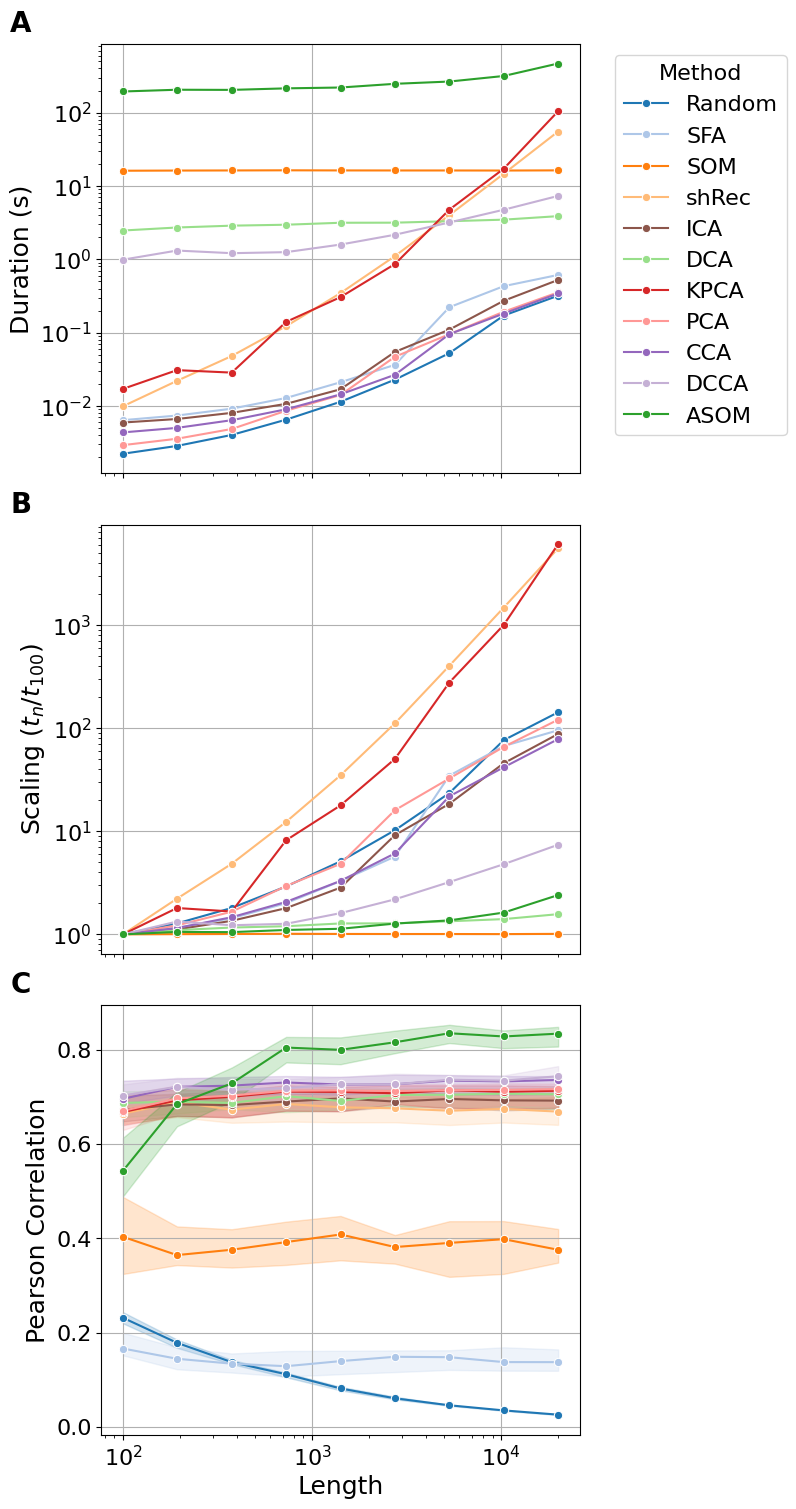

In [30]:
# Set the label sizes and style like grid
plt.rc('font', size=16)
plt.rc('axes', labelsize=18, titlesize=16)
# turn the grid on
# plt.rc('grid', linestyle='--', linewidth=0.5)
# mypalette = {
#     'Random': 'gray',
#     'SFA': 'blue',
#     'SOM': 'orange',
#     'shRec': 'purple',
#     'ICA': 'brown',
#     'DCA': 'olive',
#     'KPCA': 'pink',
#     'PCA': 'gold',
#     'CCA': 'cyan',
#     'DCCA': 'navy',
#     'ASOM': 'teal',  # or use 'green' or 'red' if you prefer
# }

tab20 = plt.get_cmap('tab20')

mypalette = {method: tab20(i) for i, method in enumerate(cols)}
mypalette['ASOM'] = 'tab:green'  # Set SOM to black for better visibility
mypalette['ICA'] = 'tab:brown'  # Set ICA to brown for better visibility


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15), sharex=True)


# ax1
voi = 'duration'
meds_duration = df.groupby(['method', 'length'])[[voi]].median().reset_index()

sns.lineplot(data=meds_duration, x='length', y=voi, hue='method', 
             palette=mypalette,
             marker='o',
             hue_order=cols,
             ax=ax1)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('Duration (s)')
ax1.set_xlabel('Length')
ax1.grid(True)
ax1.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# ax2
meds_fold = meds_duration.copy()
meds_fold[voi] = meds_fold[voi] / meds_fold.groupby('method')[voi].transform('min')

sns.lineplot(data=meds_fold, x='length', y=voi, hue='method',
             palette=mypalette,
             marker='o',
             hue_order=cols,
             ax=ax2,
             legend=False)

ax2.set_ylabel(r'Scaling ($t_{n}/t_{100}$)')
ax2.set_yscale('log')
ax2.grid(True)



# ax3
sns.lineplot(data=df, x='length', y='r', hue='method',
             palette=mypalette,
             marker='o', 
             estimator='median', 
             errorbar=('ci', 95), 
             hue_order=cols, 
             ax=ax3,
             legend=False)

ax3.set_xscale('log')
ax3.set_ylabel('Pearson Correlation')
ax3.set_xlabel('Length')
ax3.grid(True)

fig.tight_layout(pad=0, 
                 h_pad=0.0,
                 w_pad=0.00, 
                 rect=[0.02, 0, 1, 0.97])

# put A, B, C labels on the subplots
dx = -0.19
dy = 0.08
ax1.text(dx, 1 + dy, 'A', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top')
ax2.text(dx, 1 + dy, 'B', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top')
ax3.text(dx, 1 + dy, 'C', transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top')


plt.savefig("combined_plot_lengthdep.png", dpi=300)
plt.savefig("combined_plot_lengthdep.pdf", dpi=300)